<a id='top'></a>
# Introduction to Time Series

<center>
<img src='https://miro.medium.com/max/828/1*t39EWyPiUbSKjfHyb1vzEg.jpeg'>
</center>

_____

## References / Further Reading

* [Time Series Text](http://db.ucsd.edu/static/TimeSeries.pdf)

* [More on Time Series](https://otexts.com/fpp2/components.html)

* [Dynamic Time Warping Slide-Deck](https://www.cs.unm.edu/~mueen/DTW.pdf)

* [Self-Similarity Slide-Deck](https://www.cs.unm.edu/~mueen/Tutorial/CIKM2016Tutorial.pdf)

<center>
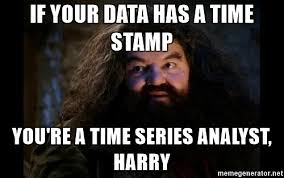
</center>

_____

## Time Series Models




### Models for Stochastic Processes

* Autoregressive (AR) Models,

$$
y_t = \mu_t 
    + \varphi_1 y_{t-1} + \varphi_2 y_{t-2} + \cdots + \varphi_p y_{t-p} 
    + \epsilon_t
$$

* Moving Average (MA) Models,

$$
y_t = \mu_t + \epsilon_t
    + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + + \theta_q \epsilon_{t-q}    
$$

* Autoregressive Moving Average (ARMA) Models,

$$
y_t = c + \varphi_1 y_{t-1} + \varphi_2 y_{t-2} + \cdots + \varphi_p y_{t-p} + \epsilon_t
        + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + + \theta_q \epsilon_{t-q}
$$

* Autoregressive Integrated Moving Average (ARIMA) Models,

$$
x_t = c + \varphi_1 x_{t-1} + \varphi_2 x_{t-2} + \cdots + \varphi_p x_{t-p} + \epsilon_t
        + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + + \theta_q \epsilon_{t-q}
$$
$$
\textrm{with} 
$$
$$
x_t = D_d(y_t) = D_{d-1}\big(D_1(y_t)\big) = D_{d-1}\big(y_t - y_{t-1}\big) = \cdots = y_t - d y_{t-1} + \frac{d(d-1)}{2} y_{t-2} - \cdots + (-1)^d y_{t-d} 
$$

<center>
<img src='http://customerthink.com/wp-content/uploads/2-tmi.jpg'>
</center>

* Seasonal Autoregressive Integrated Moving Average (sARIMA) Models,

* Autoregressive Frationally Integrated Moving Average (ARFIMA) Models,

* Vector (V) Models (such as Vector Autoregression (VAR)),

* Exogenous (X) Models (such as ARIMAX),

* etc.

### Models for Heteroskedastic Processes
*Note:* Models which capture the changes of variance over time, i.e. $\sigma^2_t \sim t$.

* Autoregressive Conditional Heteroskedasticity (ARCH),
* GARCH ('G' is for Generalized -from Engle (2003 Nobel Prize Winner) in 1982),
* GARCH-m ('m' is for "-in-mean"),
* TARCH ('T' is for Threshold),
* EGARCH ('E' is for Exponential),
* FIGARCH ('FI' is for Fractionally Integrated),
* CGARCH ('C' is for Component),
* etc.

### Recent Advances

* Wavelet-based Methods,

* Autoencoder-based Methods,

* Model-free Techniques and Hybrid Models,

* Dynamic Bayesian Networks (Hidden Markov Model (HMM) is the simplest example),

* Recurrent Neural Networks (RNN) such as:
    * Long Short-Term Memory (LSTM) Networks,
    * Gated Recurrent Unit (GRU) Networks,
    * etc.

<center>
<img src='https://i.pinimg.com/736x/0e/15/f8/0e15f8f3c42b54b9403c79f5f4d526d9--funny-cartoons-funny-memes.jpg'>
</center>
    
_____

## Table of Contents

[Back to Top](#top)

* [Basic Facts](#facts)

* [Import Libraries](#import)

* [Quick Glimpse at our Data](#data)

* [Recap](#recap)

* [Forcing Stationarity](#stationarity)
    * [Log-Scale Transformation](#log),
    * [Smoothing Transformations](#smooth),
    * [Difference Tranformation](#diff)
    
* [ACF & PACF](#acf)

* [Modeling & Parsimony](#model)

* [Forecasting](#forecast)

<center>
<img src='http://i.lvme.me/7erw65d.jpg'>
</center>

______

<a id='facts'></a>
## Basic Facts

[Back to Top](#top)

1. **Time Series** is a collection of observations (data) made sequentially (or 'in time'). They are broken down into four components:
    * The Major Trend,
    * Seasonal,
    * Cyclical,
    * Irregular (Noise).
    
2. **Time Series** analysis is used in retail, marketing, e-commerce, fraud detection, astro-physics (e.g. exoplanet detection), finance (e.g. stocks, funds, options, etc.), oil and gas (e.g. plunger well SCADA measurements, etc.), and --in general-- any sensor-based data.  

<center>
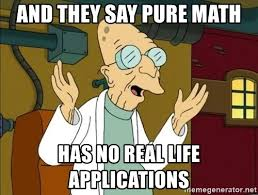
</center>
    
3. **Stationarity** is a desirable property for time series. We say a time series is stationary if:
    * it has a constant mean (with respect to time),
    * it has a constant variance (with respect to time),
    * it has an auto-covariance which is not time dependent.
    
    ![](https://i.imgur.com/3lKCxEn.png)
    
4. If a time series has a **trend** or behaves with some **seasonal** regularity, then it is not stationary.

5. There are multiple ways to check if a time series is stationary:
    * Visually check: plot a moving average or rolling median (if there are outliers) to see if there is a relationship to time,
    * **Augumented Dickey-Fuller test**: this is a hypothesis test (we reject the null hypothesis that a time series is non-stationary if the test-statistic is less than the critical value),
    * and various other (data-specific) techniques.
    
6. TO BE CONTINUED...

![](https://www.researchgate.net/profile/Amaury_Lendasse/publication/262362564/figure/fig1/AS:670043931152396@1536762330510/Plot-of-the-hourly-volume-of-some-Meme-phrases-only-5-out-of-the-1000-available-series.png)
_____

<a id='import'></a>
## Import Libraries

[Back to Top](#top)

In [4]:
import pandas as pd # read_csv, datetime, DataFrame
import numpy as np # random.normal, sin

from pandas.plotting import autocorrelation_plot as auto_corr

from matplotlib import pyplot as plt # for plotting
import seaborn as sns; sns.set() # for prettier plots / formatting / style

# jupyter cell magic for inline visualization
%matplotlib inline 

# tsa : time series analysis
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose as season
from statsmodels.tsa.arima_model import ARIMA

# metrics
from sklearn import metrics # explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
#from sklearn.utils import check_arrays # converts list-like objects to array (if needed)

# scikit-learn models
from sklearn.linear_model import LinearRegression as LinReg

In [5]:
# define a constant for figsize
SIZE = (10,6) # 10/6 is a good enough approximation of the golden ratio ~ 1.618

In [6]:
# MAPE: Mean Absolute Percentage Error 
## another useful metric --not implemented in sklearn.metrics
## See: https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

def MAPE(y_true, y_pred): 
#     y_true, y_pred = check_arrays(y_true, y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [7]:
def report_metrics(y_true, y_pred):
    print("Explained Variance:\n\t", metrics.explained_variance_score(y_true, y_pred))
    print("MAE:\n\t", metrics.mean_absolute_error(y_true, y_pred))
    print("RMSE:\n\t", np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
    print("MAPE:\n\t", MAPE(y_true, y_pred))
    print("r^2:\n\t", metrics.r2_score(y_true, y_pred))

<a id='data'></a>
## Toy Dataset

[Back to Top](#top)

<center>
<img src='https://i.pinimg.com/originals/2a/66/ac/2a66acfdd713e7fc176e030f1e5bdb97.jpg'>
</center>


In [8]:
t = np.array(range(100))

x = 2*np.sin(2*np.pi*t/10) \
    + 0.25*t \
    + 0.72*np.sqrt(t) \
    + np.random.normal(12,1,100) 

# DESCRIPTION (of x):
# forcing some seasonality with a sinusoidal 
# adding a linear trend component 
# adding a non-linear trend component  
# injecting some noise  

df = pd.DataFrame(t, columns=['t'])
df['x'] = x

df['past'] = (df.t < 75).astype(np.int)
df['future'] = 1 - df.past

In [9]:
df.head().append(df.tail())

,t,x,past,future
0,0,11.000168,1,0
1,1,13.031106,1,0
2,2,14.981348,1,0
3,3,15.291256,1,0
4,4,13.946151,1,0
95,95,44.106649,0,1
96,96,39.480481,0,1
97,97,41.387161,0,1
98,98,41.056238,0,1
99,99,44.060352,0,1


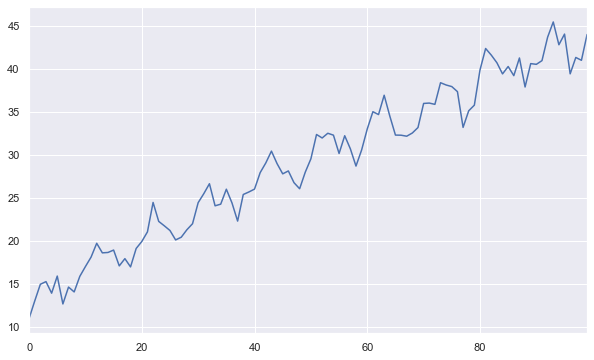

In [10]:
plt.figure(figsize=SIZE)
df['x'].plot()
plt.show()

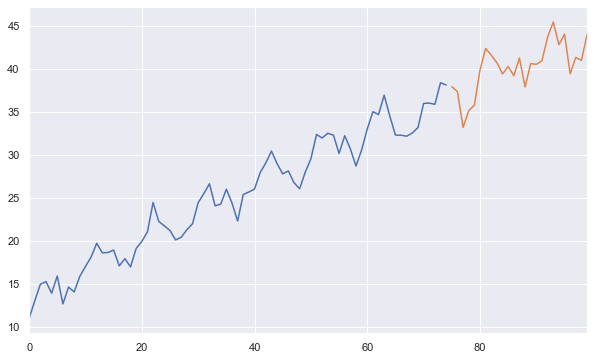

In [11]:
plt.figure(figsize=SIZE)
df.loc[df.past == 1, 'x'].plot()
df.loc[df.future == 1, 'x'].plot()
plt.show()

In [12]:
# How would you model this?

X_train = df.loc[df.past == 1, 't'].values.reshape(-1, 1)
X_test = df.loc[df.future == 1, 't'].values.reshape(-1, 1)
y_train = df.loc[df.past == 1, 'x'].values
y_test = df.loc[df.future == 1, 'x'].values

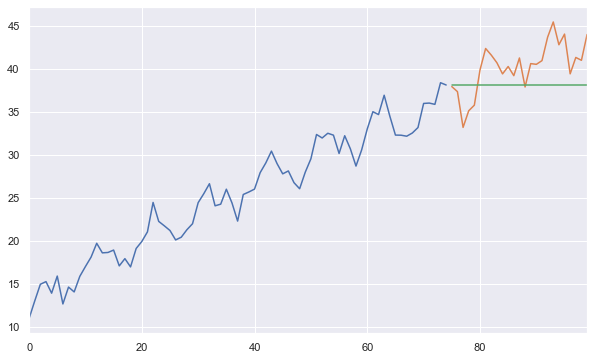

In [17]:
# naive approach

y_pred = y_train[len(y_train)-1]
y_pred = [y_pred]*25 # 25 elements of the last value

plt.figure(figsize=SIZE)
df.loc[df.past == 1, 'x'].plot()
df.loc[df.future == 1, 'x'].plot()
plt.plot(X_test, y_pred)
plt.show()

In [18]:
report_metrics(y_test, y_pred)

Explained Variance:
	 2.220446049250313e-16
MAE:
	 3.0296106816062083
RMSE:
	 3.5425226174438733
MAPE:
	 7.390902492622847
r^2:
	 -0.5514213606818896


In [19]:
# linear trend approach

lr = LinReg(n_jobs=-1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_trend = lr.predict(X_train)

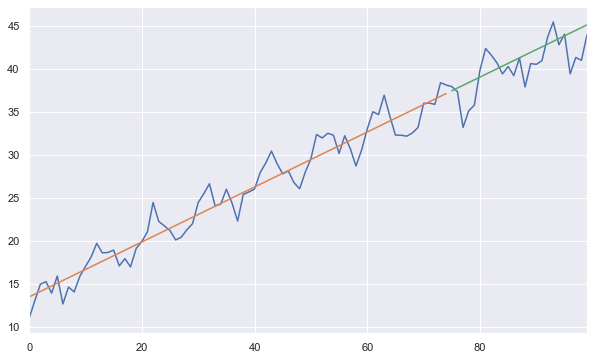

In [20]:
plt.figure(figsize=SIZE)
df['x'].plot()
plt.plot(X_train, y_trend)
plt.plot(X_test, y_pred)
plt.show()

In [21]:
report_metrics(y_test, y_pred)

Explained Variance:
	 0.4571925952760302
MAE:
	 1.868837484495321
RMSE:
	 2.3450379497116134
MAPE:
	 4.780645325643628
r^2:
	 0.32016385063886565


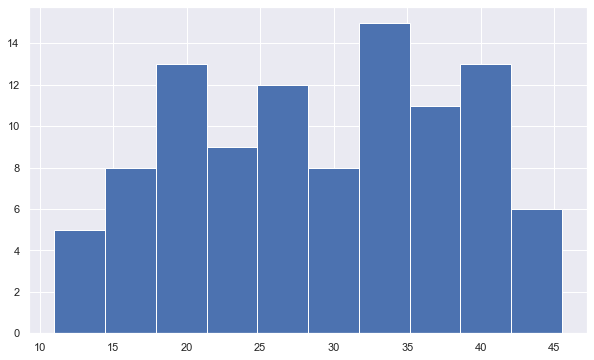

In [22]:
plt.figure(figsize=SIZE)
df.x.hist()
plt.show()

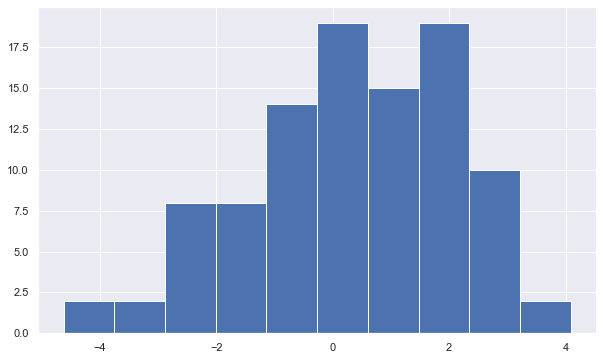

In [23]:
# what if we difference?

plt.figure(figsize=SIZE)
df.x.diff().hist()
plt.show()

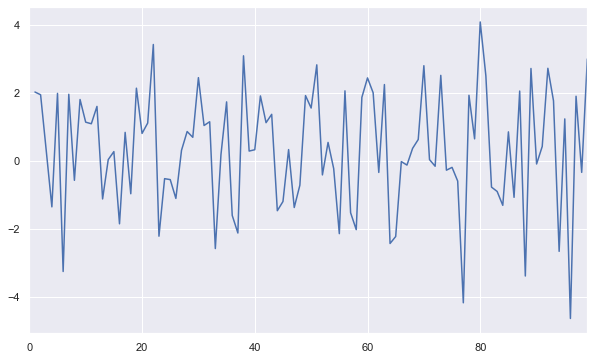

In [24]:
# does this look (more) stationary?

plt.figure(figsize=SIZE)
df.x.diff().plot()
plt.show()

In [25]:
# is this easier to predict?

df['x_diff'] = df.x.diff()
y_train = df.loc[df.past == 1, 'x_diff'].fillna(0).values
y_test = df.loc[df.future == 1, 'x_diff'].values

lr = LinReg(n_jobs=-1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_trend = lr.predict(X_train)

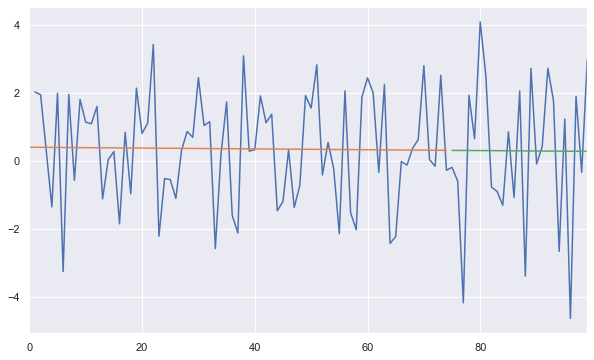

In [26]:
plt.figure(figsize=SIZE)
df['x_diff'].plot()
plt.plot(X_train, y_trend)
plt.plot(X_test, y_pred)
plt.show()

In [27]:
def rebuild_diffed(diffed_series, first_element_original):
    cumsum = pd.Series(diffed_series).cumsum()
    return cumsum.fillna(0) + first_element_original

In [31]:
y_train = rebuild_diffed(y_train, df.x[0])
y_trend = rebuild_diffed(y_trend, df.x[0])
y_test = rebuild_diffed(y_test, y_train[len(y_train)-1])
y_pred = rebuild_diffed(y_pred, y_train[len(y_train)-1])

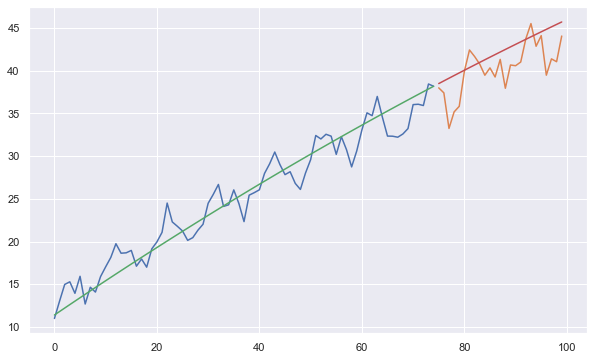

In [32]:
plt.figure(figsize=SIZE)
plt.plot(X_train, y_train)
plt.plot(X_test, y_test)
plt.plot(X_train, y_trend)
plt.plot(X_test, y_pred)
plt.show()

In [33]:
report_metrics(y_test, y_pred)

Explained Variance:
	 0.47085413300932677
MAE:
	 2.2402281456713027
RMSE:
	 2.786244634362296
MAPE:
	 5.770375261772336
r^2:
	 0.0402834291165457


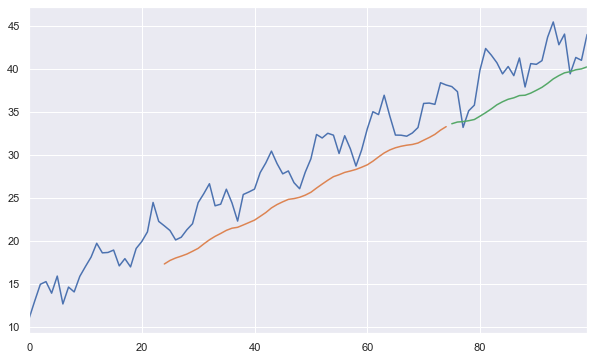

In [34]:
# smoothing approach

df['MA_25'] = df.x.rolling(window=25).mean()

plt.figure(figsize=SIZE)
df.x.plot()
df.loc[df.past == 1, 'MA_25'].plot()
df.loc[df.future == 1, 'MA_25'].plot()
plt.show()

In [35]:
y_pred = df.loc[df.future == 1, 'MA_25']

report_metrics(y_test, y_pred)

Explained Variance:
	 0.4898443541901586
MAE:
	 3.4588395986200053
RMSE:
	 3.94740249716924
MAPE:
	 nan
r^2:
	 -0.9263150882212328


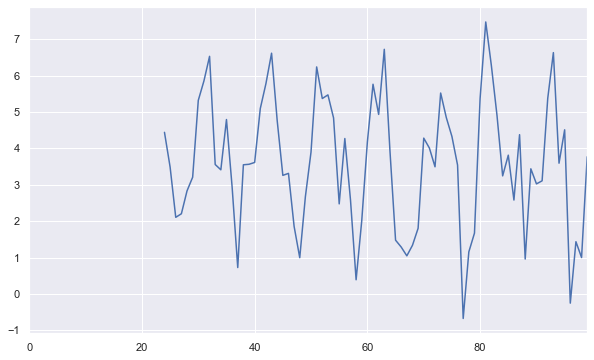

In [36]:
# does this look (more) stationary?

plt.figure(figsize=SIZE)
(df.x - df.x.rolling(window=25).mean()).plot()
plt.show()

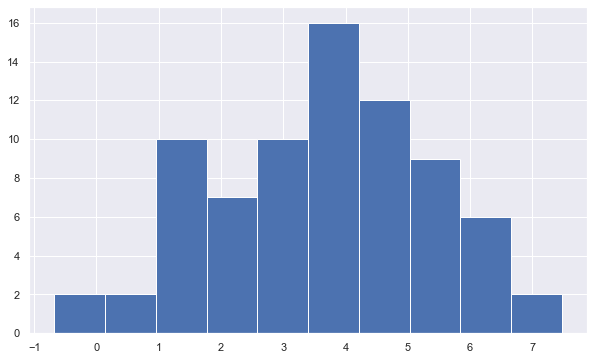

In [37]:
plt.figure(figsize=SIZE)
(df.x - df.x.rolling(window=25).mean()).hist()
plt.show()

In [38]:
# lag approach

df['lag_1'] = df.x.shift()
df.head()

,t,x,past,future,x_diff,MA_25,lag_1
0,0,11.000168,1,0,NaN,NaN,NaN
1,1,13.031106,1,0,2.030938,NaN,11.000168
2,2,14.981348,1,0,1.950241,NaN,13.031106
3,3,15.291256,1,0,0.309908,NaN,14.981348
4,4,13.946151,1,0,-1.345105,NaN,15.291256


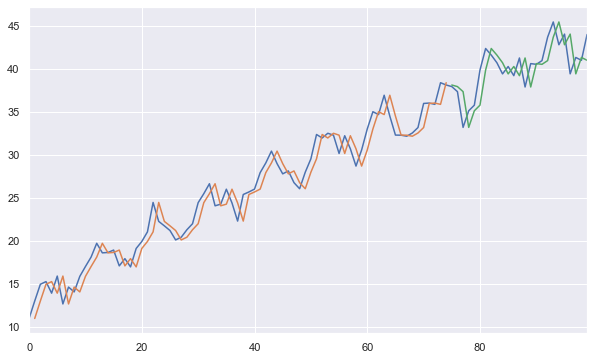

In [39]:
plt.figure(figsize=SIZE)
df.x.plot()
df.loc[df.past == 1, 'lag_1'].plot()
df.loc[df.future == 1, 'lag_1'].plot()
plt.show()

In [41]:
y_pred = df.loc[df.future == 1, 'lag_1']

report_metrics(y_test, y_pred)

Explained Variance:
	 0.3815920179229014
MAE:
	 1.8376256138906897
RMSE:
	 2.2489185185583573
MAPE:
	 nan
r^2:
	 0.374752527869073


In [42]:
# what if we combine different ideas?

df.head()

,t,x,past,future,x_diff,MA_25,lag_1
0,0,11.000168,1,0,NaN,NaN,NaN
1,1,13.031106,1,0,2.030938,NaN,11.000168
2,2,14.981348,1,0,1.950241,NaN,13.031106
3,3,15.291256,1,0,0.309908,NaN,14.981348
4,4,13.946151,1,0,-1.345105,NaN,15.291256


In [43]:
df_clean = df.dropna()
df_clean.head()

,t,x,past,future,x_diff,MA_25,lag_1
24,24,21.784843,1,0,-0.516152,17.345520,22.300995
25,25,21.240778,1,0,-0.544065,17.755144,21.784843
26,26,20.143937,1,0,-1.096841,18.039657,21.240778
27,27,20.460899,1,0,0.316962,18.258839,20.143937
28,28,21.330500,1,0,0.869601,18.500409,20.460899


In [44]:
from sklearn.linear_model import Ridge

In [45]:
X_train = df_clean.loc[df_clean.past == 1, ['t', 'MA_25', 'lag_1']].values
X_test = df_clean.loc[df_clean.future == 1, ['t', 'MA_25', 'lag_1']].values
y_train = df_clean.loc[df_clean.past == 1, 'x'].values
y_test = df_clean.loc[df_clean.future == 1, 'x'].values

lr = Ridge(alpha=10)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_trend = lr.predict(X_train)

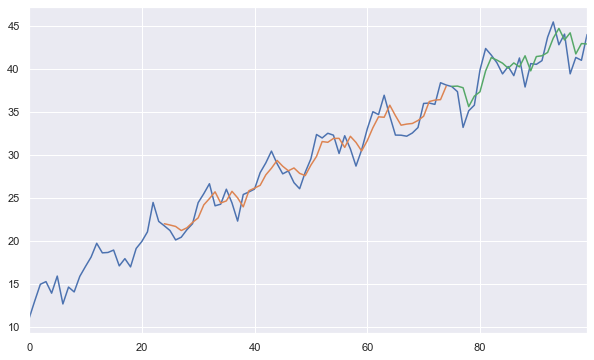

In [46]:
plt.figure(figsize=SIZE)
df['x'].plot()
plt.plot(X_train[:, 0], y_trend)
plt.plot(X_test[:, 0], y_pred)
plt.show()

In [47]:
report_metrics(y_test, y_pred)

Explained Variance:
	 0.5535260056836779
MAE:
	 1.4787298943172944
RMSE:
	 1.9510035035458517
MAPE:
	 3.7469350295602633
r^2:
	 0.529433938066457


<a id='recap'></a>
## Recap

[Back to Top](#top)

By just fiddling around with some different approaches, we have accidentally built a tool-kit for constructing ARIMA models:

* trends,

* differences,

* moving averages,

* lags.

But our approach up to this point has been very haphazard. Now we will get a little more rigorous and systematic in our approach.

<center>
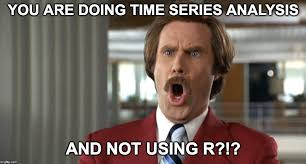
</center>


In [48]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    plt.figure(figsize=SIZE)
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)


In [49]:
# start fresh

df = pd.DataFrame(t, columns=['t'])
df['x'] = x

df['past'] = (df.t < 75).astype(np.int)
df['future'] = 1 - df.past

In [50]:
df.head()

,t,x,past,future
0,0,11.000168,1,0
1,1,13.031106,1,0
2,2,14.981348,1,0
3,3,15.291256,1,0
4,4,13.946151,1,0


In [53]:
from pmdarima.arima import ADFTest, KPSSTest, PPTest

In [54]:
dickey = ADFTest(alpha=0.05, k=10)
kpss = KPSSTest(alpha=0.05)
perron = PPTest(alpha=0.05, lshort=False)

names = ['ADF', 'KPSS', 'PP']
stationarity_tests = [dickey, kpss, perron]
transformations = ['None', 'Difference', 'Log(1+X)', 'De-Trended']

for i, test in enumerate(stationarity_tests):
    name = names[i]
    for transform in transformations:
        if transform == 'None':
            data = df[df.past == 1].x
        elif transform == 'Difference':
            data = df[df.past == 1].x.diff().dropna()
        elif transform == 'Log(1+X)':
            data = np.log1p(df[df.past == 1].x)
        else:
            data = (df.x - df.x.rolling(window=25).mean()).dropna()
        
        print(name, "+", transform, "\n\t", test.should_diff(data))
    print()

ADF + None 
	 (0.8886445250543372, True)
ADF + Difference 
	 (0.01, False)
ADF + Log(1+X) 
	 (0.44586733993711214, True)
ADF + De-Trended 
	 (0.6135121297872997, True)

KPSS + None 
	 (0.01, True)
KPSS + Difference 
	 (0.1, False)
KPSS + Log(1+X) 
	 (0.01, True)
KPSS + De-Trended 
	 (0.1, False)

PP + None 
	 (0.22112700775855298, True)
PP + Difference 
	 (0.01, False)
PP + Log(1+X) 
	 (0.018798739375992284, False)
PP + De-Trended 
	 (0.1963974100417108, True)



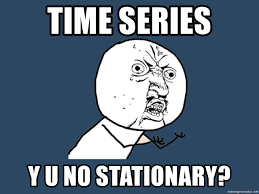

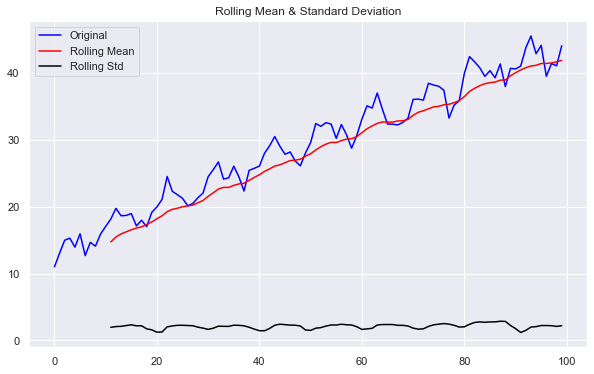

In [55]:
test_stationarity(df.x)

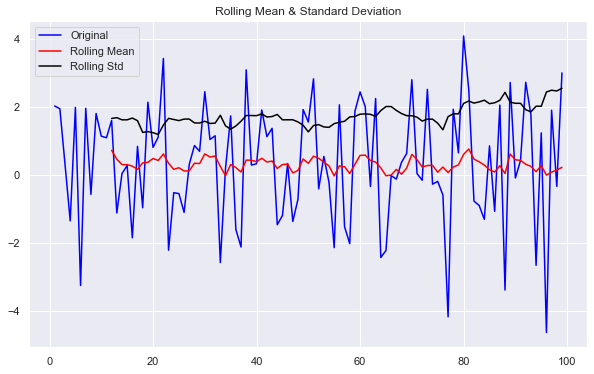

In [56]:
test_stationarity(df.x.diff().dropna())

![](https://miro.medium.com/max/1000/1*hJ_P0bVRLNNjcc5st5lu-A.jpeg)

In [57]:
from pmdarima import tsdisplay, plot_pacf, auto_arima

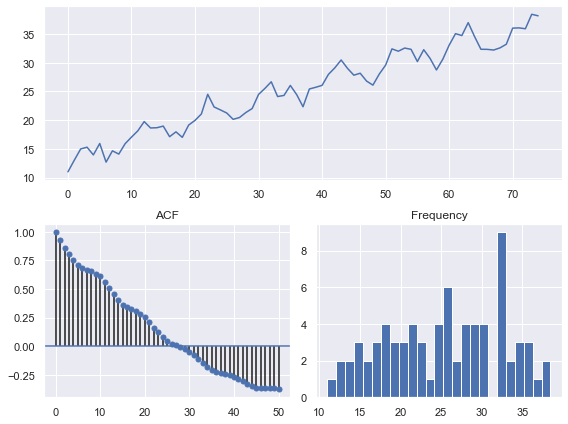

/Users/frkornet/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


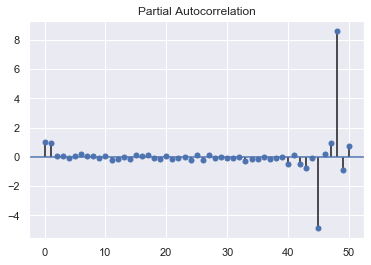

In [58]:
data = df[df.past == 1].x
tsdisplay(data, lag_max=50)
plot_pacf(data, lags=50)

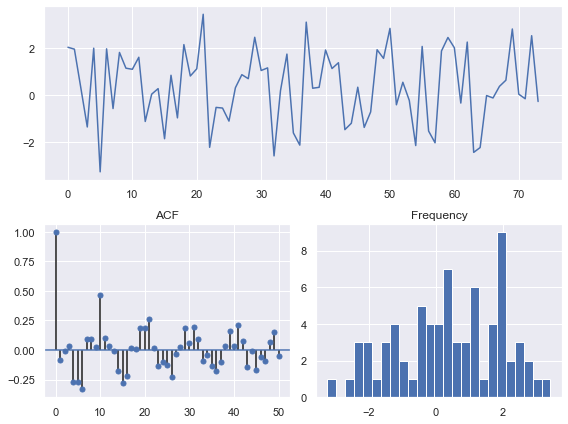

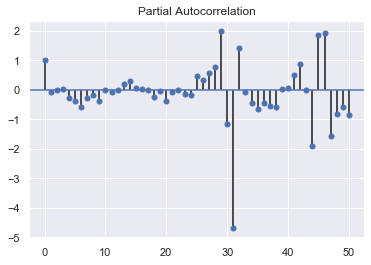

In [59]:
data = df[df.past == 1].x.diff().dropna()
tsdisplay(data, lag_max=50)
plot_pacf(data, lags=50)

In [61]:
auto_arima?

In [60]:
data = df[df.past == 1].x.values
arima = auto_arima(data, d=1, m=10,
                   start_p=0, start_q=0, 
                   start_P=0, start_Q=0,
                   max_order=50, 
                   trace=True, suppress_warnings=True, 
                   maxiter=200, error_action='ignore', 
                   information_criterion='aic')

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 10); AIC=280.385, BIC=284.994, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 10); AIC=258.748, BIC=267.964, Fit time=0.035 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 10); AIC=266.370, BIC=275.586, Fit time=0.030 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 10); AIC=282.348, BIC=284.652, Fit time=0.006 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 10); AIC=281.827, BIC=288.739, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 0, 10); AIC=259.535, BIC=271.055, Fit time=0.067 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 10); AIC=259.486, BIC=271.006, Fit time=0.046 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 1, 10); AIC=266.671, BIC=275.887, Fit time=0.033 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 1, 10); AIC=261.483, BIC=275.307, Fit time=0.141 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 

![](http://www.quickmeme.com/img/03/03979d82bcdf9d2e99dd84125e37d0a157104efbee42430933d4cc3180dd43cd.jpg)

In [62]:
arima

ARIMA(maxiter=200, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(1, 0, 1, 10),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [63]:
arima.params()

array([ 0.04923121,  0.35598706, -0.99903074,  0.76173097, -0.18239706,
        1.19536834])

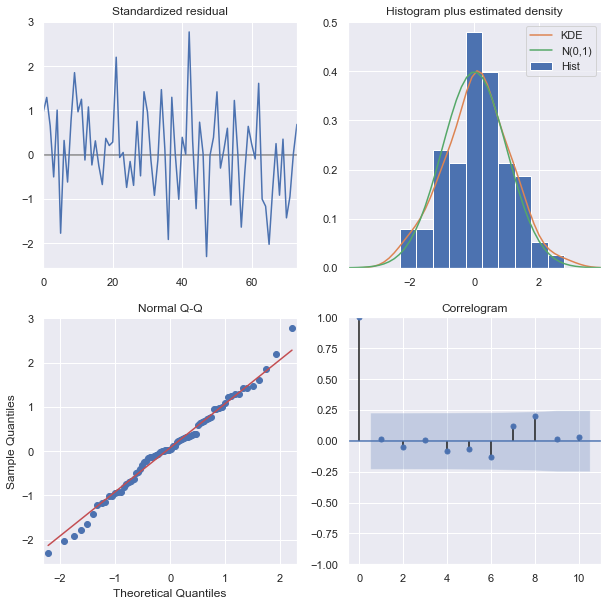

In [64]:
arima.plot_diagnostics(figsize=(10,10));

In [65]:
arima.resid()

array([ 1.06793359e+01,  1.71011650e+00,  2.18020783e+00,  1.05879618e+00,
       -8.08934931e-01,  1.59010521e+00, -2.77942053e+00,  4.94700232e-01,
       -9.47169609e-01,  1.12687856e+00,  2.11123854e+00,  1.07469494e+00,
        1.39019379e+00, -1.36877083e-01,  1.19742064e+00, -2.60645347e-01,
        3.44668766e-01, -2.82872011e-01, -7.51826433e-01,  4.07182719e-01,
        2.25129376e-01,  3.11468979e-01,  2.42169773e+00, -7.24888790e-02,
        5.26971916e-02, -8.16628669e-01, -1.71100022e-01, -7.65639520e-01,
        8.26071407e-01, -5.29133311e-01,  1.56226523e+00,  1.05443211e+00,
       -1.44066897e-01, -1.01271496e+00, -1.27664458e-01,  1.61375277e+00,
        1.34293029e-01, -2.10909770e+00,  1.42316874e+00,  1.04227331e-02,
       -1.10850964e+00,  4.28279296e-01,  8.52788061e-03,  3.04563963e+00,
        3.36259513e-01, -1.34246756e+00,  8.04772159e-01,  3.14975189e-02,
       -2.53160824e+00, -2.00711005e-02,  4.26745003e-01,  1.55783155e+00,
       -3.35419589e-01,  

In [66]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   75
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 10)   Log Likelihood                -115.382
Date:                            Thu, 30 Jan 2020   AIC                            242.764
Time:                                    10:54:22   BIC                            256.588
Sample:                                         0   HQIC                           248.278
                                             - 75                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0492      0.037      1.341      0.180      -0.023       0.121
ar.L1          0.3560      0.165      2.159      0.031       0.033       0.679
ma.L1         -0.9990      1.115     -0.896      0.370      -3.185       1.187
ar.S.L10       0.7617      0.183      4.165      0.000       0.403       1.120
ma.S.L10      -0.1824      0.248     -0.736      0.462      -0.668       0.304
sigma2         1.1954      1.284      0.931      0.352      -1.320       3.711
===================================================================================
Ljung-Box (Q):                       36.66   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.62   Prob(JB):                         1.00
Heteroskedasticity (H):               1.05   Skew:                            -0.02
Prob(H) (two-sided):                  0.91   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

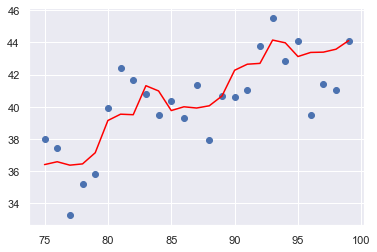

In [67]:
data = df[df.future==1].x
pred = arima.predict(n_periods=25)

x = data.index

plt.scatter(x, data)
plt.plot(x, pred, c='red')
plt.show()

In [68]:
from pmdarima.metrics import smape

In [69]:
smape(data, pred)

3.7053799630408695

In [70]:
report_metrics(data, pred)

Explained Variance:
	 0.6430639136521118
MAE:
	 1.4846308898434035
RMSE:
	 1.7428898069761987
MAPE:
	 3.747742832207686
r^2:
	 0.624470236872692


In [71]:
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose

In [72]:
data = df[df.past == 1].x.values
decomposed = decompose(data, 'additive', m=20)

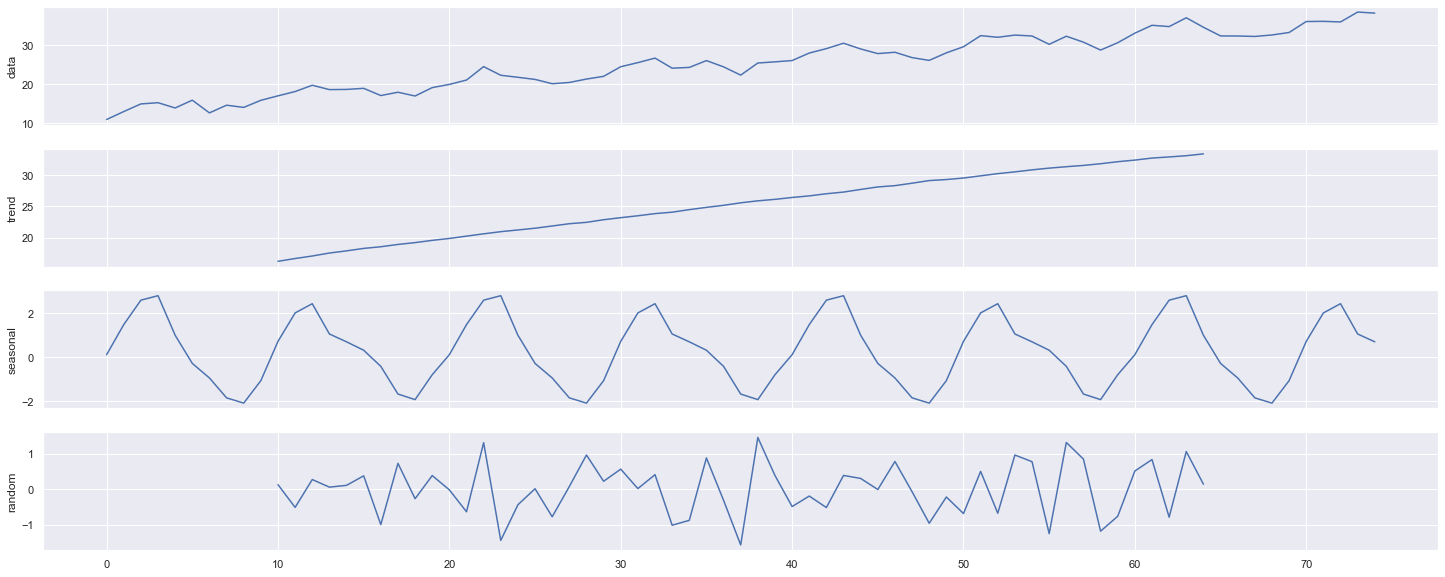

In [73]:
figure_kwargs = {'figsize': (25, 10)}

decomposed_plot(decomposed, figure_kwargs=figure_kwargs)
plt.show()

# Your Turn...

In [95]:
t = np.array(range(100))

x = 100 + t + np.sin(2*np.pi*t/10) \
  * t**.25 \
  * np.random.normal(5,3,100) 

# DESCRIPTION (of x):
# forcing some seasonality with a sinusoidal 
# adding a linear trend component 
# adding a non-linear trend component  
# injecting some noise  

df = pd.DataFrame(t, columns=['t'])
df['x'] = x

df['past'] = (df.t < 75).astype(np.int)
df['future'] = 1 - df.past

In [96]:
df.head()

,t,x,past,future
0,0,100.000000,1,0
1,1,103.996453,1,0
2,2,104.905913,1,0
3,3,109.874302,1,0
4,4,101.394179,1,0


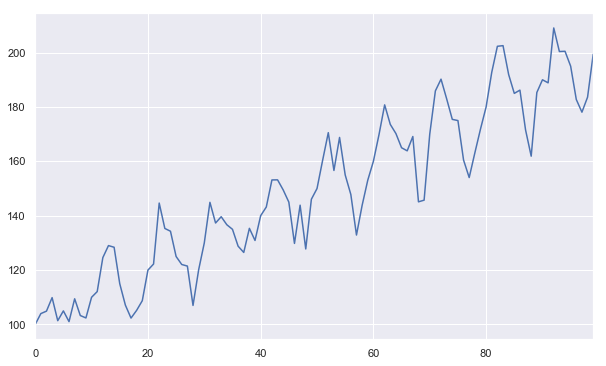

In [97]:
plt.figure(figsize=SIZE)
df['x'].plot()
plt.show()

In [ ]:
# Try to build a simple predictor for the 'future' part of our new dataset
# HINT: taking the log of the data could be useful at some point

# More to Come...

![](http://www.gilgalad.co.uk/img/content/time_series_orig.png)